The goal of this notebook is to figure out from which species the sequence-based computational annotations (e.g., ISS) come from.

In [1]:
from collections import defaultdict
import os
import sys 
from tqdm import tqdm
import itertools
import utils.file_utils as utils
sys.path.append("/data/jeff-law/projects/fungcat-function-prediction/src")
#sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))))
import fungcat_settings as f_settings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

/home/jeffl/.local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.chdir("../../")

In [3]:
computational_ev_codes = set(['ISS','ISO','ISA','ISM','IGC','IBA','IBD','IKR','IRD','RCA'])
# computational_ev_codes = set(['TAS','NAS', 'IC', 'ND'])
# computational_ev_codes = set(['EXP', 'IDA', 'IPI', 'IMP', 'IGI', 'IEP'])

In [10]:
print(f_settings.UNIPROT_TO_SPECIES)

inputs/protein-similarity/uniprot-species/2017-10-17-uniprot-prots-19-species-plus-string.tab


In [11]:
# first get the taxon for each species
uniprot_to_species = utils.readDict(f_settings.UNIPROT_TO_SPECIES, 1,2)
# # also build the reverse
# species_to_uniprot = {s: set() for s in selected_species}
# for p in uniprot_to_species:
#     species_to_uniprot[str(uniprot_to_species[p])].add(p)
from_species = defaultdict(int)
ev_codes = defaultdict(int)

# load the GAF file
gaf_file = "/data/inputs/goa/2017_09/taxon/19-strains-goa.gaf"
for prot, ev_code, with_from in utils.readColumns(gaf_file, 2, 7, 8):
    if uniprot_to_species.get(prot, prot) != "243277":
        continue
    if ev_code in computational_ev_codes:
        ev_codes[ev_code] += 1
#         with_from = with_from.split(':')
#         if with_from[0] != "UniProtKB":
#             from_species['Not UniProtKB'] += 1
#             continue
#         prot = with_from[-1]
#         from_species[uniprot_to_species.get(prot, "Not found")] += 1



defaultdict(<type 'int'>, {'243277': 9, '632': 3, '83332': 9, '83333': 466, '257313': 2, '99287': 49, 'Not found': 23798, '208964': 2})


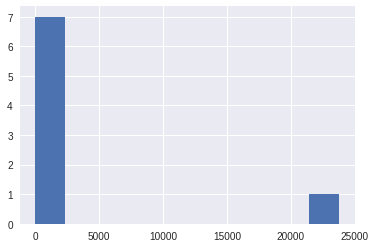

In [9]:
print(from_species)
s = pd.Series(from_species)
s.hist()
plt.show()

In [12]:
print(ev_codes)

defaultdict(<type 'int'>, {'ISS': 3645, 'IBA': 2309})
